

Centroids_x:  [15.041666666666666, 72.33333333333333, 68.86666666666666]
Centroids_y:  [54.75, 30.952380952380953, 81.2]


Centroids_x:  [17.089355221850756, 81.09336078082076, 69.7947181281142]
Centroids_y:  [41.94258992346212, 35.29900686952298, 80.13242675103155]


Centroids_x:  [17.746286937979864, 64.8552941324985, 65.06396332717541]
Centroids_y:  [51.82467941735874, 33.4539370909501, 77.25825106077293]


Centroids_x:  [14.146871714375687, 53.72287137983581, 70.41023042406968]
Centroids_y:  [65.05820924929127, 32.81968532814047, 73.74366351171939]


Centroids_x:  [17.451667715829675, 69.40239238267151, 66.79438666899894]
Centroids_y:  [54.10240738518403, 32.85898361537254, 78.69747599032995]
[[1.00000000e+00 2.53929027e+00 4.39424169e-01]
 [1.15767134e-01 1.00000000e+00 2.63489796e-01]
 [1.00000000e+00 9.22341960e-01 2.95758542e-01]
 [1.31934474e-01 1.72173836e-01 1.00000000e+00]
 [1.00000000e+00 1.33969658e-01 6.53145343e-02]
 [9.89214527e-02 1.00000000e+00 3.37612594e-01]
 [2.

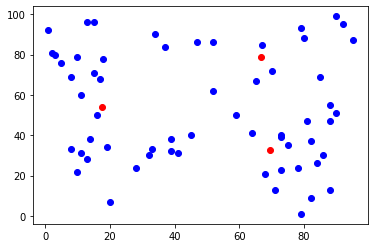

In [65]:
import numpy as np
import matplotlib.pyplot as plt

n=60
x=np.random.randint(1,100,n)
y=np.random.randint(1,100,n)


x_c=np.mean(x)
y_c=np.mean(y)



def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)



def c_means(k,max_iter):    
    m, eps=2, 0.2
    u=np.zeros([n,k])
    u_new=np.zeros([n,k])
    
    def check(x,y,clust,k):
        for i in range(0,len(clust)):
            for j in range(0,k):
                if(clust[i]==j):
                    u[i][j]=1
                else:
                    u[i][j]=0

    def clusters(x_cc,y_cc,x,y):
        for i in range(0,n):
            r=dist(x_cc[0],y_cc[0],x[i],y[i])
            numb=0
            for j in range(0,k):
                if(r<dist(x_cc[j],y_cc[j],x[i],y[i])):
                    numb=j
                    r=dist(x_cc[j],y_cc[j],x[i],y[i])
                if(j==k-1):
                    clust[i]=numb

    
    R=0
    for i in range(0,n):
        if(dist(x_c,y_c,x[i],y[i])>R):
            R=dist(x_c,y_c,x[i],y[i])

    x_cc=[R*np.cos(2*np.pi*i/k)+x_c for i in range(k)]
    y_cc=[R*np.sin(2*np.pi*i/k)+y_c for i in range(k)]
        
    clust=[0]*n


    clusters(x_cc,y_cc,x,y)
    check(x,y,clust,k)
  #  u = np.random.dirichlet(np.ones(k),size=n)
   # print(np.round(u,2))
        
    #x_cc=[0]*k
    #y_cc=[0]*k
            
    for dik in range(max_iter):
        u_sum=[0]*n
        for i in range(0,n):
            for j in range(0,k):
                u_sum[i]+=u[i][j]
                
        for i in range(0,n):
            for j in range(0,k):
                sum=0
                for l in range(0,k):
                    if(clust[i]==l):
                        sum+=(dist(x_cc[j],y_cc[j],x[i],y[i])/dist(x_cc[l],y_cc[l],x[i],y[i]))**(2/(m-1))
                u_new[i][j]=1/sum
        
        for i in range(0,k):
            x_downSum=0
            x_upSum=0
            y_downSum=0
            y_upSum=0
            for j in range(0,n): 
                if(clust[j]==i):
                    x_downSum+=(u_sum[j])**m
                    x_upSum+=(x[j]*((u_sum[j])**m))

                    y_downSum+=(u_sum[j])**m
                    y_upSum+=(y[j]*((u_sum[j])**m))
            x_cc[i]=x_upSum/x_downSum
            y_cc[i]=y_upSum/y_downSum 
        print('\n')    
        print('Centroids_x: ',x_cc)
        print('Centroids_y: ',y_cc)
        
        bool=True
        for i in range(0,n):
            for j in range(0,k):
                if(u[i][j]-u_new[i][j]<eps):
                    bool=False
        if(bool==True):
            dik=max_iter
            break
            
        for i in range(0,n):
            for j in range(0,k):
                u[i][j]=u_new[i][j]
    print(u)
    plt.scatter(x,y,color='b')
    plt.scatter(x_cc,y_cc,color='r')
    plt.show()
c_means(3,5)


